# Ayden Cook
### Homework assignment #2 submission


## Solving Irrotational Inviscid Fluid Flows using the Finite Difference Method ##
***
(c) Jason E. Ybarra - Unauthorized Distribution is Prohibited

### Theory ###

A fluid flow away from the boundary layer can often be approximated as an irrotational incompressible inviscid flow. Inviscid means that viscous or shearing forces are assumed to be negligible, leaving only pressure and weight acting on the fluid. This typically occurs at high Reynolds numbers. Incompressible means that the density of the fluid remains constant, such that the amount of fluid entering a volume must equal the amount of fluid leaving the volume. This can be represented mathematically as the continuity equation
$$\nabla \cdot \mathbf{u} = 0 $$

An irrotational flow is one where $\nabla \times \mathbf{u} = 0$. From vector calculus we know that the curl of a gradient is the zero vector. Therefore for an irrotational flow, we can express the velocity as the gradient of a potential,
$$\mathbf{u} = \nabla \phi $$

Imposing the continuity equation we get Laplace's equation for the velocity potential
$$ \nabla^{2} \phi = 0 $$

Orthogonal to lines of constant velocity potential are streamlines defined by
$$ u = \frac{\partial \psi}{\partial y} \quad v = -\frac{\partial \psi}{\partial x} $$
where $\psi$ is the stream function. It must also be a solution to Laplace's equation, thus
$$ \nabla^{2} \psi = 0 $$

The flow can solved either using the velocity potential or the stream function. However, it is often easier to set up the boundary conditions for the stream function.


***
#### Finite Difference Method ####

The finite difference method involves creating a grid of points to solve the differential equations at each point. In this tutorial we will restrict ourselves to the 2-D case. Suppose the resolution of the grid in the $x$-direction is $\Delta x$, where the nodes of the grid are indexed with $i$ and $j$. For any abitrary function $f$, the approximation of the first derivative of $f$ at node ($i$,$j$) with respect to $x$ is
$$ \frac{\partial f}{\partial x} = \frac{f_{i+1,j} - f_{i-1,j}}{2\Delta x} $$

Similarily the second order derivative with respect to $x$ is given by
$$ \frac{\partial^{2} f}{\partial x^{2}} = \frac{f_{i+1,j} - 2f_{i,j} + f_{i-1,j}}{(\Delta x)^{2}} $$

The finite difference Poisson's equation for an inviscid flow is then
$$ \frac{\partial^{2}\psi}{\partial x^{2}} + \frac{\partial^{2}\psi}{\partial y^{2}}
= \frac{\psi_{i+1,j} - 2\psi_{i,j} + \psi_{i-1,j}}{(\Delta x)^{2}} 
+ \frac{\psi_{i,j+1} - 2\psi_{i,j} + \psi_{i,j-1}}{(\Delta y)^{2}} = 0
$$

If we restrict ourselves to the case $\Delta y$ = $\Delta x$, we can solve for potential at point ($i$,$j$) as
$$ \psi_{i,j} = \frac{\psi_{i+1,j} + \psi_{i-1,j} + \psi_{i,j+1} + \psi_{i,j-1}}{4} $$

The simplest algorithm to solve the potential is to use the above equation to iteratively update the potential over many iterations while maintaining boundary conditions. Thus our equation becomes
$$ \psi_{i,j}^{n+1} = \frac{\psi_{i+1,j}^{n} + \psi_{i-1,j}^{n} + \psi_{i,j+1}^{n} + \psi_{i,j-1}^{n}}{4} $$

**Note** : Python NumPy 2-D arrays are indexed by *row* then *column*. We will still index our grid (x,y) in the calculations, but we will transpose this grid when plotting. 

### Exercise 1: Inviscid Flow Around a Corner ###

In this example we will solve for an inviscid flow around a sharp corner using a $n_{x} \times n_{y}$ grid. To solve Poissons's Equation we need to set boundary conditions. Where the scalar field is spatially constant, such that $\frac{\partial \psi}{\partial x} = 0$ and $\frac{\partial \psi}{\partial y} = 0$, the fluid is not moving.


**Step 1**. Load the Python modules we will be using. NumPy provides mathematical and array functions. Pyplot provides plotting functionality.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Step 2**. Create a grid by defining a 2-D NumPy array. For this example, make a $50 \times 50$ NumPy array named `psik`, initially filled with ones

In [3]:
nx = 50
ny = 50
psik = np.ones(shape=(nx,nx))

**Step 3**. Now we set the boundary conditions. We are solving for the stream function, so the boundary values we set will be along the surface of the flow. In order to set the direction of the flow initially in the positive $x$-direction we consider the velocity equation
$$u = \frac{\partial \psi}{\partial y}$$ Then for a positive $x$-direction velocity, the gradient of the stream function must increase with $y$. Therefore we will set the value of the potential at the top surface to be greater than the bottom surface.

- A $25 \times 25$ block at the origin of the grid (`psik[:25,:25]`) will represent the inner corner. Set the values of this region to 0.
- Set the values in the top row and right column to 3.


In [4]:
psik[:25, :25] = 0
psik[:, 49] = 3
psik[49, :] = 3

#### Plotting the scalar field ####

**Step 4**. We can use the code below to create a visual representation of the grid.

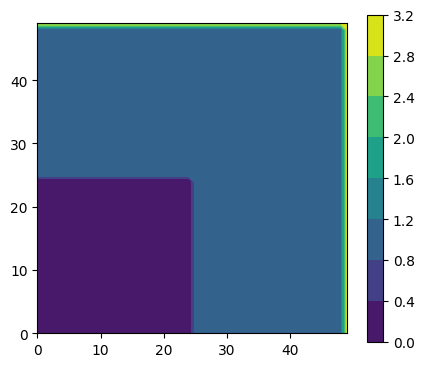

In [5]:
X, Y = np.meshgrid(range(nx), range(ny))
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(X, Y, psik.T)
fig.colorbar(cs, shrink=0.85)
plt.show()

#### Solving Poisson's Equation ####

**Step 5.** Now let's solve Poisson's equation through iterative updating and maintaining boundary conditions 

In [6]:
psik_update = np.copy(psik)
for iteration in range(500):
    psik_old = np.copy(psik_update)
    for i in range(1,nx-1): #for each row except the first & last one 
        for j in range(1,ny-1): #for each column except the first & last
            psik_update[i,j] = 0.25*(psik_old[i+1,j] + psik_old[i-1,j] + psik_old[i,j+1] + psik_old[i,j-1])
    psik_update[:25,:25] = 0 #maintain the lower boundary condition
    psik_update[:,0] = psik_update[:,1] #update bottom row - maintain continuity at simulation boundary
    psik_update[0,:] = psik_update[1,:] #update left column - maintain continuity at sim boundary

**Step 6.** Plot the results in the code block below

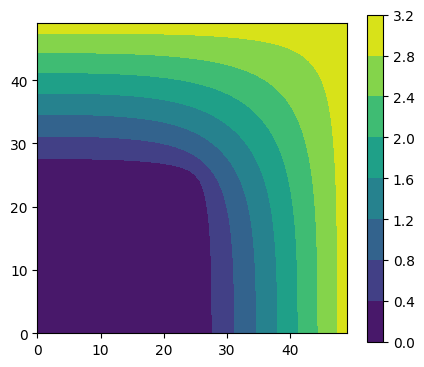

In [7]:
### For the student ###
X, Y = np.meshgrid(range(nx), range(ny))
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(X, Y, psik_update.T)
fig.colorbar(cs, shrink=0.85)
plt.show()

**Step 7.** Now increase the number of iterations to 300 and view the results

In [8]:
### For the student ###


### Exercise 2: Plotting Streamlines ###

Remember that our velocity components are given by 
$$ u = \frac{\partial \psi}{\partial y} \quad v = -\frac{\partial \psi}{\partial x} .$$ 
We can create an array that contains the velocity in the $x$-direction using
```
u = np.zeros((nx,ny))
for i in range(1,nx-1):
     for j in range(1,ny-1):
         u[i,j] = (psik_update[i,j+1] - psik_update[i,j-1])/2.
```
However, NumPy has powerful array functionality that allows us to use a single line of code to do the same work, more efficently, than the double `for` loop. Thus we can alternatively use the following
```
u = np.zeros((nx,ny))
u[1:-1,1:-1] = (psik_update[1:-1,2:] - psik_update[1:-1,:-2])/2.
```

**Step 1.** Calculate the velocity arrays `u` and `v`.

In [9]:
#calculate velocity components
u = np.zeros((nx,ny))
u[1:-1,1:-1] = (psik_update[1:-1,2:] - psik_update[1:-1,:-2])/2.
v = np.zeros((nx,ny))
v[1:-1,1:-1] = -(psik_update[2:,1:-1] - psik_update[:-2,1:-1])/2.

**Step 2.** The PyPlot function `streamplot` can be used to plot streamlines. Try it out.

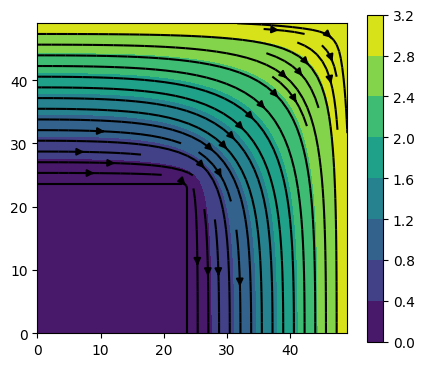

In [10]:
#To plot streamlines over potential
X, Y = np.meshgrid(range(nx), range(ny))
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(X, Y, psik_update.T)
ax1.streamplot(X, Y, u.T, v.T, color='k') #newer versions of PyPlot allow tuning of number of lines, e.g. density=[0.6]
fig.colorbar(cs, shrink=0.85)
plt.show()

### Exercise 3: Flow Over A Quarter Circle ###

**Step 1.** Now it is your turn. Instead of a sharp corner, make the flow go over circle of radius 25 units. Set the boundary of the circle (and within the circle) to 0, and the top boundary to 2. We will also make grid longer in the x-direction ($50 \times 100$) and have the flow continue to the right, so do **NOT** set the right boundary - but do enforce continuity 

Add the missing piece to the code below

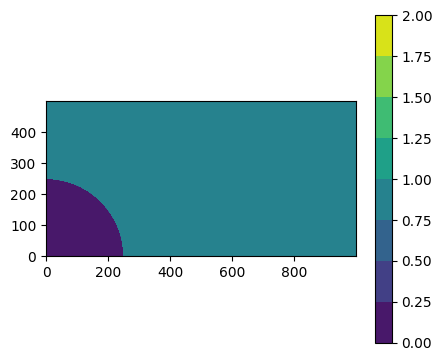

In [11]:
nx = 1000
ny = 500
psik2 = np.ones(shape=(nx,ny))
### Set the boundary conditions ###
psik2[:, ny-1] = 2
psik2[:, 0] = 0
radius = 250
for i in range(nx):
    for j in range(ny):
        if (i**2 + j**2 <= radius**2):
            psik2[i, j] = 0

#To plot streamlines over potential
X, Y = np.meshgrid(range(nx), range(ny))
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(X, Y, psik2.T)
fig.colorbar(cs, shrink=0.85)
plt.show()

### Exercise 4: How many iterations? ###

In this exercise you will determine criteria for the number of iterations to run. Let's define a value that compares
the result of a calculation to the result from the previous iteration. We will call this value the root mean square (RMS) fractional error defined as

$$ err_{RMS} = \sqrt{\frac{1}{N}\sum \left(\frac{\psi^{n+1} - \psi^{n}}{\psi^{n+1}}\right)^{2} }$$
where $\psi^{n+1} \ne 0$. If this value is below some tolerance value the loop stops. You should also include a maximum iteration value.

**Step 1.** Try different tolerance values (e.g. 0.005, 0.001, 0.0005, 0.0002) and observe the results.

In [ ]:
psik2up = np.copy(psik2)
iter = 0
maxiter = 800 #max number of iterations to run
threshold = 0.00015

while True:
    psikc = np.copy(psik2up)
    for i in range(1,nx-1): #for each row except first and last one
        for j in range(1,ny-1): #for each column except first and last
            psik2up[i,j] = 0.25*(psikc[i+1,j] + psikc[i-1,j] + psikc[i,j+1] + psikc[i,j-1])
    psik2up[:,0] = 0 #bottom boundary
    psik2up[0,:] = psik2up[1,:] #maintain continuity at left
    psik2up[-1,:] = psik2up[-2,:] #maintain continuity at right
    ########## INSERT CIRCLE BC CODE HERE #########
    #

    #
    ################################################
    notzero = np.where(abs(psik2up) > 0)
    err = np.sqrt(np.mean(((psik2up[notzero] - psikc[notzero])/psik2up[notzero])**2)) #Calc RMS frac difference
    if (err < threshold):
        break
    iter = iter + 1
    if (iter > maxiter):
        break

print('{0} iterations for threshold = {1}'.format(iter,threshold))

In [ ]:
u2 = np.zeros((nx,ny))
u2[1:-1,1:-1] = (psik2up[1:-1,2:] - psik2up[1:-1,:-2])/2.
v2 = np.zeros((nx,ny))
v2[1:-1,1:-1] = -(psik2up[2:,1:-1] - psik2up[:-2,1:-1])/2.
X, Y = np.meshgrid(range(nx), range(ny))
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(X, Y, psik2up.T)
nn = 5
#ax1.streamplot(X, Y, u2.T, v2.T, color='k') #newer versions of pyplot allow a density argument, e.g. density=[0.7]
ax1.quiver(X[::nn,::nn], Y[::nn,::nn], u2.T[::nn,::nn], v2.T[::nn,::nn], color='k') #Use this to plot vector field
fig.colorbar(cs, shrink=0.85)
plt.show()

### Exercise 5: Homework Problem - Flow Over Mountains ###

Simulate a flow going over "mountains". 

- Make a grid $180 \times 40$ 
- Place 1-2 mountains half-way along the flow. The shape of the mountains can be triangular or something more sophisticated. The mountains should not be taller than 20 units high.
- Solve the flow equation and plot the streamlines


In [ ]:
### INSERT CODE HERE ###


----

Here are some resources for further information and activities for learning computational fluid dynamics with Python.

- Lorena A. Barba - [12 steps to Navier-Stokes](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)
- Tan Beng Hau \& Claus-Dieter Ohl - [PyCFD](http://ohllab.org/CFD_course/)

-----

&copy;2020 Jason E. Ybarra. These exercises are released under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67dcb8b6-4078-4b5a-86e0-d6c3ac5ada19' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>